In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from xgboost import XGBRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn import metrics    

D:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from datetime import datetime, timedelta
import csv
import mysql.connector
mydb = mysql.connector.connect(
  host="TW100103289",       # 数据库主机地址
#    host="TW100102221",       # 数据库主机地址
  user="root",    # 数据库用户名
  passwd="l5cv0",   # 数据库密码
  database="l5cv0",auth_plugin='mysql_native_password'
)

In [3]:
Update_daytime=120

abbrno ='6P'

In [4]:
endtime = datetime.now() - timedelta(days=2/24)
starttime = datetime.now() - timedelta(days=2/24)- timedelta(days=Update_daytime) 
Update_time = " AND t.REPORTTIME > '" +'{date:%Y-%m-%d %H:%M:%S}'.format( date=starttime) + "' AND t.REPORTTIME < '" + '{date:%Y-%m-%d %H:%M:%S}'.format( date=endtime)  + "'"

In [5]:
Sqla =  " select t.REPORTTIME  AS  xml_mea_time,"
Sqla = Sqla + " t.INFORVALUE22  AS  xml_mea_tool,"
Sqla = Sqla + " t.INFORVALUE17 AS xml_start_time,"
#Sqla = Sqla + " t.INFORVALUE10  AS  xml_tool_id,"
Sqla = Sqla + " t.INFORVALUE5 AS  XML_SHEET_ID,"
Sqla = Sqla + " t.CHARTID,"
Sqla = Sqla + " t.MONITORITEMVALUE AS Y"
Sqla = Sqla + " from l5caryspch_spchis t"
#Sqla = Sqla + " where t.CHARTID = 'B15H6/PEP1/ADI/AHVA_V1_CD1'"
Sqla = Sqla + " where 1 = 1"
Sqla = Sqla + Update_time
#Sqla = Sqla + " and t.REPORTTIME > '2019-11-20 08:00:00'"
Sqla = Sqla + " and t.GRAPHTYPE ='X'"
Sqla = Sqla + " and t.INFORVALUE22 like 'ABMOV%'"
#Sqla = Sqla + " and t.INFORVALUE10 = 'ABIEXL00'"
Sqla = Sqla + " and t.INFORVALUE24 ='GL=ADC'"
Sqla = Sqla + " and t.MONITOR_ITEM_NAME = 'ASVA_V1_CD1_AVE'"
Sqla = Sqla + " and t.CHARTID like '%1/ADI%1'"
Sqla = Sqla + " and t.INFORVALUE9 = '" + abbrno + "'"

df = pd.read_sql_query(Sqla, mydb)

df_Y = df[['XML_SHEET_ID',
           'CHARTID',
           'Y']]

In [6]:
#Update_daytime=1/24

endtime = datetime.now() - timedelta(days=1/24)
starttime = datetime.now() - timedelta(days=1/24)- timedelta(days=Update_daytime) 
#Update_time = " AND t.REPORTTIME > '" +'{date:%Y-%m-%d %H:%M:%S}'.format( date=starttime) + "' AND t.REPORTTIME < '" + '{date:%Y-%m-%d %H:%M:%S}'.format( date=endtime)  + "'"
Update_time = " AND t.XML_START_TIME > '" +'{date:%Y-%m-%d %H:%M:%S}'.format( date=starttime) + "' AND t.XML_START_TIME < '" + '{date:%Y-%m-%d %H:%M:%S}'.format( date=endtime)  + "'"


Sqla =  " select t.* "
Sqla = Sqla + " from svm_cd_r2r t"
Sqla = Sqla + " where 1=1"
Sqla = Sqla + " and t.XML_OP_ID = 'GL-IEX'"
Sqla = Sqla + " and t.XML_ABBR_NO = '" + abbrno + "'"
#Sqla = Sqla + " and t.XML_TOOL_ID = 'ABIEXL10'"
Sqla = Sqla + Update_time

In [7]:
df = pd.read_sql_query(Sqla, mydb)

In [8]:
df = df.dropna(axis = 0, subset = ['LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG'] )

df = df.drop_duplicates('XML_SHEET_ID')

df_X=df[['XML_SHEET_ID','XML_MODEL_NO' ,
       'XML_TOOL_ID','XML_ABBR_NO',
       'LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG']]


In [9]:
df = pd.merge(df_Y , df_X, on = 'XML_SHEET_ID', how = 'left')

In [10]:
df = df.dropna(axis = 0, subset = ['LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG'] )

df = df.drop_duplicates('XML_SHEET_ID')

df=df[['XML_SHEET_ID','XML_MODEL_NO',
       'XML_TOOL_ID','XML_ABBR_NO','CHARTID',  
       'LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG','Y']]

In [11]:
df.to_csv('CD_DF_ALL.csv')

In [12]:
df = pd.read_csv('CD_DF_ALL.csv')

In [13]:
Sqlb = " SELECT distinct (USL + LSL)/2 as 'cd_target' FROM l5caryspchsn_graph WHERE active_flag = 'Y' and graph_type = 'X' and CHART_ID = '" + df.CHARTID[0] + "'" 

df_cd_target = pd.read_sql_query(Sqlb, mydb)

In [14]:
cd_target = df_cd_target.cd_target[0]

In [15]:
df = df.drop(['XML_SHEET_ID','XML_MODEL_NO','XML_TOOL_ID','XML_ABBR_NO','CHARTID','Unnamed: 0'],axis=1)

In [16]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [17]:
trainy_x = df.drop(['Y'],axis=1)
trainy_y = df.Y

trainsp_x = df.drop(['SCANSPEED'],axis=1)
trainsp_y = df.SCANSPEED

In [18]:
X_train, X_test, y_train, y_test = train_test_split(trainy_x, trainy_y, test_size=0.3, random_state=56)

model_y = xgb.XGBRegressor()

eval_set =  [(X_test, y_test)]

model_y.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='mae', eval_set=eval_set,verbose=False)

pred = model_y.predict(X_test)

from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',rmse(y_test,pred))
print('R2:',metrics.r2_score(y_test,pred))
print('MAPE:',mean_absolute_percentage_error(y_test, pred))

MAE: 0.06825265935262023
RMSE: 0.08121163968003925
R2: 0.1085422354444171
MAPE: 1.0755507219559084


In [19]:
X_train, X_test, y_train, y_test = train_test_split(trainsp_x, trainsp_y, test_size=0.3, random_state=100)

model_sp = xgb.XGBRegressor()

eval_set =  [(X_test, y_test)]

model_sp.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='mae', eval_set=eval_set,verbose=False)

pred_sp = model_sp.predict(X_test)

from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,pred_sp))
print('RMSE:',rmse(y_test,pred_sp))
print('R2:',metrics.r2_score(y_test,pred_sp))
print('MAPE:',mean_absolute_percentage_error(y_test, pred_sp))

MAE: 2.474066670735677
RMSE: 3.159729727419443
R2: 0.7715007945452057
MAPE: 1.3841143154358742


In [20]:
trainsp_x.Y = cd_target

[174 174 174 174 174 174 174 174 174 174 174 175 174 176 175 175 175 175
 175 176 177 177 179 178 179 177 176 180 179 178 178 176 177 176 176 179
 177 180 174 180 180 180 179 179 180 180 180 178 178 179 178 176 176 178
 178 177 178 178 178 177 177 178 174 175 177 176 176 176 174 174 174 174
 174 174 174 174 176 174 174 174 172 174 174 171 173 174 169 169 174 169
 204 204 204 204 204 204 203 203]
174


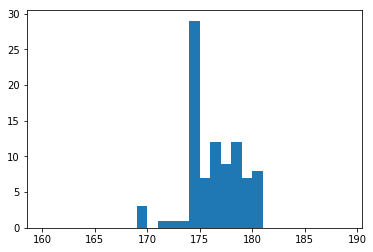

In [21]:
from scipy import stats
pred_new_scp = model_sp.predict(trainsp_x)
bins = [i for i in range(160,190,1)]
plt.hist(pred_new_scp,bins=bins)
#print(pred_new_scp)
print(pred_new_scp.astype(np.int))
best_node = stats.mode(pred_new_scp.astype(np.int))[0][0]
print(best_node)

In [22]:
result = []
i_num = []

for i in range(int(df.SCANSPEED.min()-10),int(df.SCANSPEED.max()+10),1):
    trainy_x.SCANSPEED = i
    pred_new_vd = model_y.predict(trainy_x)
    result.append(np.median(pred_new_vd))
    i_num.append(i)

In [23]:
i_num

[160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217]

In [24]:
result

[6.3053083,
 6.3053083,
 6.3053083,
 6.3053083,
 6.3053083,
 6.3053083,
 6.3053083,
 6.3053083,
 6.3053083,
 6.3053083,
 6.3053083,
 6.3053083,
 6.3053083,
 6.3053083,
 6.3053083,
 6.3053083,
 6.3053083,
 6.3053083,
 6.305748,
 6.307144,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867,
 6.309867]

In [25]:
df_result = pd.DataFrame(list(zip(i_num, result)), columns=['i_num','result'])
df_result

i_num    result
0     160  6.305308
1     161  6.305308
2     162  6.305308
3     163  6.305308
4     164  6.305308
5     165  6.305308
6     166  6.305308
7     167  6.305308
8     168  6.305308
9     169  6.305308
10    170  6.305308
11    171  6.305308
12    172  6.305308
13    173  6.305308
14    174  6.305308
15    175  6.305308
16    176  6.305308
17    177  6.305308
18    178  6.305748
19    179  6.307144
20    180  6.309867
21    181  6.309867
22    182  6.309867
23    183  6.309867
24    184  6.309867
25    185  6.309867
26    186  6.309867
27    187  6.309867
28    188  6.309867
29    189  6.309867
30    190  6.309867
31    191  6.309867
32    192  6.309867
33    193  6.309867
34    194  6.309867
35    195  6.309867
36    196  6.309867
37    197  6.309867
38    198  6.309867
39    199  6.309867
40    200  6.309867
41    201  6.309867
42    202  6.309867
43    203  6.309867
44    204  6.309867
45    205  6.309867
46    206  6.309867
47    207  6.309867
48    208  6.309867
49    209  6.309867
50    210  6.309867
51    211  6.309867
52    212  6.309867
53    213  6.309867
54    214  6.309867
55    215  6.309867
56    216  6.309867
57    217  6.309867

In [26]:
for i in range(len(i_num)):
    #if df_result.loc[df_result.i_num[i]] == best_node:
    if df_result.i_num[i] == best_node:
        best_result = df_result.result[i]
        print(best_result)

6.3053083419799805


In [27]:
plt.plot(i_num,result)
plt.plot(best_node, best_result, marker='8')
#num , res = df_result.loc[df_result.i_num == np.median(pred_new_scp)
#np.median(pred_new_scp),('i_num', 'result')].values[1]
plt.annotate(s="best node", xy=(best_node, best_result), xytext=(165, 6.3058))
            #arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2"))
plt.show()

In [28]:
interval_day = 1

Sqla =  " select t.* "
Sqla = Sqla + " from svm_cd_r2r t"
Sqla = Sqla + " where 1=1"
Sqla = Sqla + " and t.XML_OP_ID = 'GL-IEX'"
Sqla = Sqla + " and t.XML_ABBR_NO = '" + abbrno + "'"
Sqla = Sqla + " and t.XML_START_TIME >= NOW() - INTERVAL " + str(interval_day) + " DAY "

Sqla

df_now = pd.read_sql_query(Sqla, mydb)

df_now.to_csv('CD_DF_NOW.csv')
df_now = pd.read_csv('CD_DF_NOW.csv')

In [29]:
df_now

Unnamed: 0      SEQ XML_TRX_NAME  XML_PROJECT_ID XML_FAB  \
0             0  2732965  APC_SVM_RUN            9999     L5C   
1             1  2732966  APC_SVM_RUN            9999     L5C   
2             2  2732967  APC_SVM_RUN            9999     L5C   
3             3  2732968  APC_SVM_RUN            9999     L5C   
4             4  2732969  APC_SVM_RUN            9999     L5C   
..          ...      ...          ...             ...     ...   
442         442  2739431  APC_SVM_RUN            9999     L5C   
443         443  2739432  APC_SVM_RUN            9999     L5C   
444         444  2739433  APC_SVM_RUN            9999     L5C   
445         445  2739434  APC_SVM_RUN            9999     L5C   
446         446  2739435  APC_SVM_RUN            9999     L5C   

          XML_START_TIME XML_END_TIME  XML_FOUP_ID  XML_LOT_ID  XML_SLOT_NO  \
0    2020-07-30 18:12:57            x          NaN  6P0B7JQ900          NaN   
1    2020-07-30 18:14:06            x          NaN  6P0B7JQ900          NaN   
2    2020-07-30 18:15:17            x          NaN  6P0B7JQ900          NaN   
3    2020-07-30 18:16:39            x          NaN  6P0B7JQ900          NaN   
4    2020-07-30 18:17:40            x          NaN  6P0B7JQ900          NaN   
..                   ...          ...          ...         ...          ...   
442  2020-07-31 06:27:42            x          NaN  6P0B7HP400          NaN   
443  2020-07-31 06:28:46            x          NaN  6P0B7HP400          NaN   
444  2020-07-31 06:30:26            x          NaN  6P0B7HP400          NaN   
445  2020-07-31 06:32:27            x          NaN  6P0B7HP400          NaN   
446  2020-07-31 06:35:20            x          NaN  6P0B7HP400          NaN   

     ... AIRCOL2  AIRN2 VAC  LPILL LPILR LPILA   LPL   LPR SCANSPEED ILLM_AVG  
0    ...     0.7    0.7 -85   3286  3210  3352  7231  7217     205.0  4428.97  
1    ...     0.7    0.7 -85   3286  3210  3352  7231  7217     205.0  4428.97  
2    ...     0.7    0.7 -85   3286  3206  3354  7214  7217     205.0  4428.97  
3    ...     0.7    0.7 -85   3286  3206  3354  7214  7217     205.0  4428.97  
4    ...     0.7    0.7 -85   3286  3206  3354  7214  7217     205.0  4428.97  
..   ...     ...    ...  ..    ...   ...   ...   ...   ...       ...      ...  
442  ...     0.7    0.7 -85   3286  3206  3354  7246  7202     205.0  4429.87  
443  ...     0.7    0.7 -85   3286  3206  3354  7246  7202     205.0  4429.87  
444  ...     0.7    0.7 -85   3284  3206  3354  7217  7229     205.0  4429.87  
445  ...     0.7    0.7 -85   3284  3206  3354  7217  7229     205.0  4429.87  
446  ...     0.7    0.7 -86   3289  3196  3354  7263  7234     205.0  4429.87  

[447 rows x 81 columns]

In [30]:
df_now = df_now.dropna(axis = 0, subset = ['LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG'] )

df_now = df_now.drop_duplicates('XML_SHEET_ID')

df_now=df_now[['XML_SHEET_ID','XML_MODEL_NO' ,
       'XML_TOOL_ID','XML_ABBR_NO',
       'LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG']]


In [31]:
df_now = df_now.drop(['XML_SHEET_ID','XML_MODEL_NO','XML_TOOL_ID','XML_ABBR_NO','SCANSPEED'],axis=1)

In [32]:
df_now['Y'] = cd_target

[202 203 203 202 202 203 203 203 203 204 203 202 203 203 203 203 203 203
 203 203 204 204 203 202 203 203 203 203 203 204 203 203 202 203 203 203
 203 204 203 204 203 203 203 203 202 204 203 204 203 203 203 204 203 203
 204 202 203 203 203 204 204 203 204 202 203 204 203 203 203 203 203 203
 203 203 203 203 203 203 202 203 203 203 203 202 204 203 203 203 202 203
 203 204 203 203 203 203 203 204 203 203 203 203 203 204 203 204 203 203
 202 203 203 204 203 203 204 202 203 203 203 203 203 203 203 203 203 203
 203 204 203 203 203 204 203 203 204 203 203 204 203 203 203 203 203 203
 203 201 203 203 203 204 202 204 204 203 203 203 203 204 203 203 203 203
 203 203 203 203 203 204 203 202 203 203 202 203 203 203 204 203 203 204
 203 203 203 203 204 203 203 204 203 203 203 203 203 203 203 203 203 203
 203 203 204 203 203 203 203 203 203 202 203 203 203 203 204 203 202 203
 203 203 203 203 203 204 203 203 204 203 203 203 203 203 203 203 203 204
 203 203 203 203 203 204 203 203 203 203 204 203 20

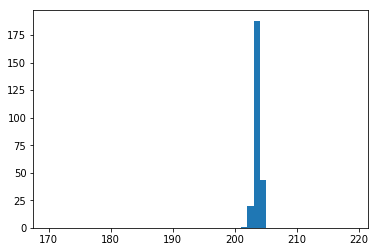

In [33]:
pred_now = model_sp.predict(df_now)
#print(pred_now)
bins = [i for i in range(170,220,1)]
plt.hist(pred_now,bins=bins)
#print(pred_new_scp)
print(pred_now.astype(np.int))
best_node_test = stats.mode(pred_now.astype(np.int))[0][0]
print(best_node_test)

In [34]:
result = []
i_num = []

for i in range(int(np.median(pred_now)-50),int(np.median(pred_now)+50),1):
    trainy_x.SCANSPEED = i
    pred_new_vd = model_y.predict(trainy_x)
    result.append(np.median(pred_new_vd))
    i_num.append(i)

result = []
i_num = []

for i in range(int(best_node_test-50),int(best_node_test+50),1):
    df_now_sm.SCANSPEED = i
    pred_new_vd = model_y.predict(df_now_sm)
    result.append(np.mean(pred_new_vd))
    #result.append(stats.mode(pred_new_vd.astype(np.int))[0][0])
    i_num.append(i)

In [35]:
plt.plot(i_num,result)